#Introdução aos métodos discretos

Nome: Ana Beatriz N. Rubião Graça

## 1) Demostre a fórmula da diferença unilateral à esquerda.




Série de Taylor para $x = x_{i-1}$

$f(x_{i-1}) = f(x_i) + f'(x_i)(x_{i-1}-x_i) + \frac{f''(x_{i})(x_{i-1}-x_i)²}{2} $

Fazendo $x_{i-1} - x_i = -h$

$f(x_{i-1}) = f(x_i) - hf'(x_i) + \frac{h²f''(x_{i})}{2} $ (1)

Série de Taylor para $x = x_{i-2}$

$f(x_{i-2}) = f(x_i) + f'(x_i)(x_{i-2}-x_i) + \frac{f''(x_i)(x_{i-2}-x_i)²}{2} $

Fazendo $x_{i-2} - x_i = -2h$

$f(x_{i-2}) = f(x_i) - 2hf'(x_i) + 2h²f''(x_{i}) $ (2)


Multiplicando (1) por 4 e subtraindo de (2)

$f(x_{i-2}) - 4f(x_{i-1}) = -3f(x_i) + 2hf'(x_i) $

Isolando $f'(x_i)$

$ f'(x_i) = \frac{f(x_{i-2}) - 4f(x_{i-1}) +3f(x_i)}{2h} $

## 2) Aproxime a derivada de primeira ordem da função  $f(x)=sen(x)$ utilizando a diferenças finitas $O(h^2)$ utilizando $h=0.1$ e $h=0.01$ para $x\in[0,1]$. Plote a derivada analítica e as aproximadas para comparar os resultados. 



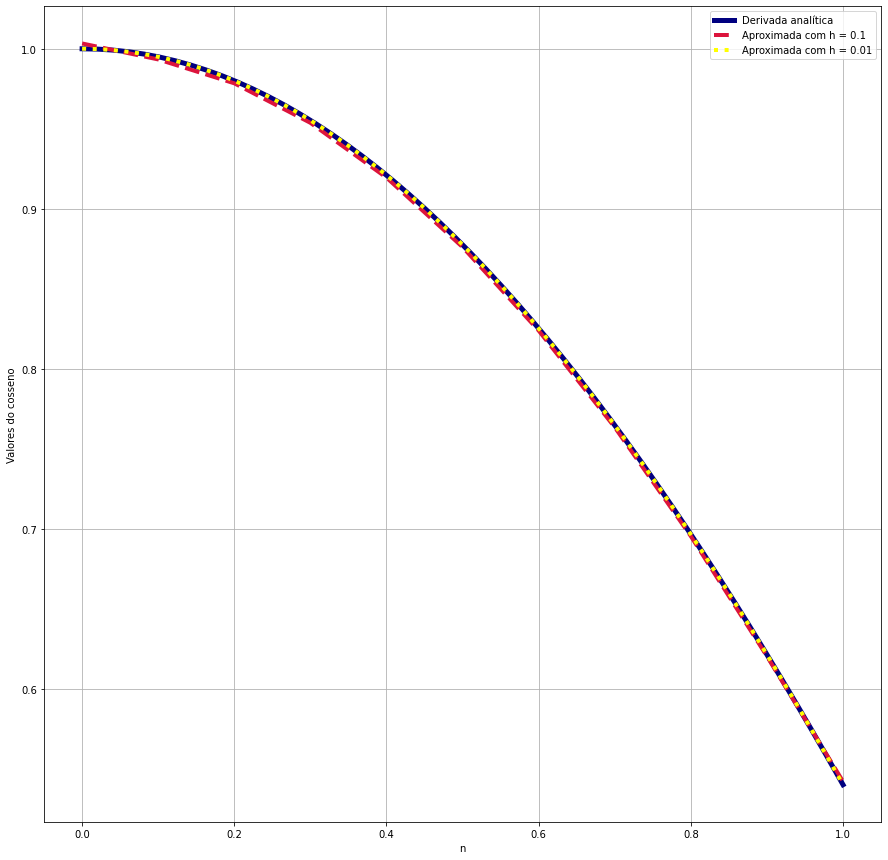

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.linspace(0,1)
cos = np.cos(n)

#Para h = 0.1
h1 = 0.1
n1 = np.arange(0,1+h1,h1)
f1 = np.sin(n1)

df1_d = np.zeros(len(n1))

#Primeiro ponto: unilateral à direita
df1_d[0] = (-f1[2]+4*f1[1]-3*f1[0])/(2*h1)
#Pontos do meio: centrada
for i in range(1,len(n1)-1):
  df1_d[i] = (f1[i+1] - f1[i-1])/(2*h1)
#Último ponto: unilateral à esquerda
df1_d[len(n1)-1] = (f1[len(n1)-3]-4*f1[len(n1)-2]+3*f1[len(n1)-1])/(2*h1)

#Para h = 0.01
h2 = 0.01
n2 = np.arange(0,1+h2,h2)
f2 = np.sin(n2)

df2_d = np.zeros(len(n2))

#Primeiro ponto: unilateral à direita
df2_d[0] = (-f2[2]+4*f2[1]-3*f2[0])/(2*h2)
#Pontos do meio: centrada
for i in range(1,len(n2)-1):
  df2_d[i] = (f2[i+1] - f2[i-1])/(2*h2)
#Último ponto: unilateral à esquerda
df2_d[len(n2)-1] = (f2[len(n2)-3]-4*f2[len(n2)-2]+3*f2[len(n2)-1])/(2*h2)

plt.figure(figsize=(15, 15))
plt.plot(n,cos,color='navy',linewidth=5,label='Derivada analítica')
plt.plot(n1,df1_d,color='crimson',linestyle='dashed',linewidth=4,label='Aproximada com h = 0.1')
plt.plot(n2,df2_d,color='yellow',linestyle='dotted',linewidth=4,label='Aproximada com h = 0.01')
plt.grid()
plt.legend()
plt.ylabel('Valores do cosseno')
plt.xlabel('n')
plt.show()

## 3) Utilizando a função  $f(x)=sen(x)$ , mostre que o erro diferença progressiva e diferença centrada decrescem em $O(h)$ e $O(h^2)$, respectivamente. Para isso faça o que se pede:




### a) Tomando $h\in[10^{-6}, 10^{0}]$, plote, em escala log-log, o gráfico de $h$ versus erro absoluto e calcule a inclinação destas retas.

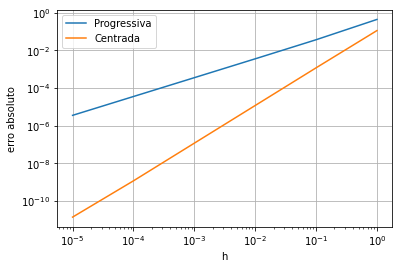

A inclinação da reta laranja é 1.9809185322094227 enquanto da reta azul é 1.0184353680684768


In [21]:
import numpy as np
import matplotlib.pyplot as plt

h = np.array([0.00001,0.0001,0.001,0.01,0.1,1])

erro_p = np.zeros(len(h))
erro_c = np.zeros(len(h))
df_p = np.zeros(len(h))
df_c = np.zeros(len(h))

for i in range(0,len(h)):
  df_p[i] = (np.sin(np.pi/4+h[i]) - np.sin(np.pi/4))/h[i]
  df_c [i]= (np.sin(np.pi/4+h[i])- np.sin(np.pi/4-h[i]))/(2*h[i])
  erro_p[i] = abs(np.cos(np.pi/4) - df_p[i])
  erro_c[i] = abs(np.cos(np.pi/4) - df_c[i])


plt.loglog(h,erro_p,label='Progressiva')
plt.loglog(h,erro_c,label='Centrada')
plt.grid()
plt.legend()
plt.xlabel('h')
plt.ylabel('erro absoluto')
plt.show()

inc_c = (np.log(erro_c[-1])- np.log(erro_c[0]))/(np.log(h[-1])- np.log(h[0]))
inc_p = (np.log(erro_p[-1])- np.log(erro_p[0]))/(np.log(h[-1])- np.log(h[0]))

print("A inclinação da reta laranja é",inc_c, "enquanto da reta azul é",inc_p)

### b) Tomando $h\in[10^{-20}, 10^{0}]$, plote, em escala log-log, o gráfico de $h$ versus erro absoluto. O que aconteceu e por que?

Na letra A, foi possível perceber que para valores de $h<=10^{-6}$, começa a haver erros numéricos por conta da precisão da máquina. No caso de B, extrapolou-se esse valor até $h=10^{-20}$, piorando ainda mais o gráfico e o erro da aproximação.

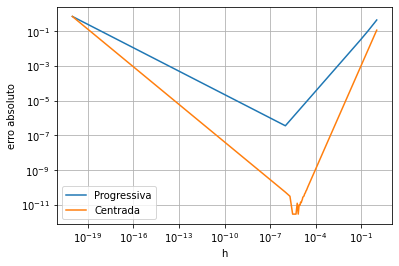

In [26]:
import numpy as np
import matplotlib.pyplot as plt

h = np.arange(10**(-20),1+0.01,0.000001)

erro_p = np.zeros(len(h))
erro_c = np.zeros(len(h))
df_p = np.zeros(len(h))
df_c = np.zeros(len(h))

for i in range(0,len(h)):
  df_p[i] = (np.sin(np.pi/4+h[i]) - np.sin(np.pi/4))/h[i]
  df_c [i]= (np.sin(np.pi/4+h[i])- np.sin(np.pi/4-h[i]))/(2*h[i])
  erro_p[i] = abs(np.cos(np.pi/4) - df_p[i])
  erro_c[i] = abs(np.cos(np.pi/4) - df_c[i])

plt.loglog(h,erro_p,label='Progressiva')
plt.loglog(h,erro_c,label='Centrada')
plt.grid()
plt.legend()
plt.xlabel('h')
plt.ylabel('erro absoluto')
plt.show()